In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install pillow

Model loaded from ./breast_cancer/BreastCancerMobileNet.h5
1/1 [==============================] - 0s 393ms/step
Predicted Class: class_2
Prediction Confidence: 0.99646


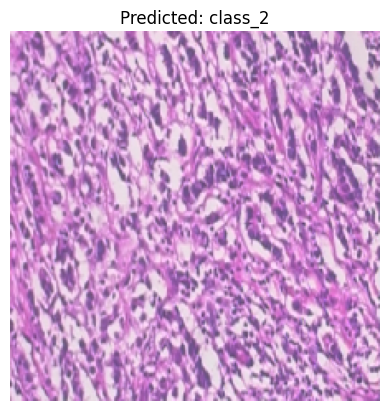

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load the model from the saved .h5 file
def load_trained_model(model_path):
    model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")
    return model

# Function to preprocess the image for MobileNetV3
def preprocess_input_image(img_path, target_size=(224, 224)):
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert image to numpy array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to make it a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image
    img_array = tf.keras.applications.mobilenet_v3.preprocess_input(img_array)
    
    return img_array

# Function to predict the class of the image
def predict_image(model, img_path, class_names):
    # Preprocess the input image
    img_array = preprocess_input_image(img_path)
    
    # Make prediction
    predictions = model.predict(img_array)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])
    
    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    
    # Print the result
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Prediction Confidence: {predictions[0][predicted_class_index]:.5f}")

    # Optionally, visualize the input image
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# Example Usage:
model_path = "./breast_cancer/BreastCancerMobileNet.h5"  # Path to your saved model
img_path = "./breast_cancer/breast_malignant_0001.jpg"  # Path to the image you want to predict

# Load the model
model = load_trained_model(model_path)

# Provide the class names (use the same list as the one used in training)
# For example:
class_names = ["class_1", "class_2", "class_3", "class_4", "class_5"]  # Replace with actual class names

# Make a prediction
predict_image(model, img_path, class_names)